Potência via FFT (Parseval) = 0.4924
Somatório de "ppx" normalizado em relação ao seu tamanho 0.15621


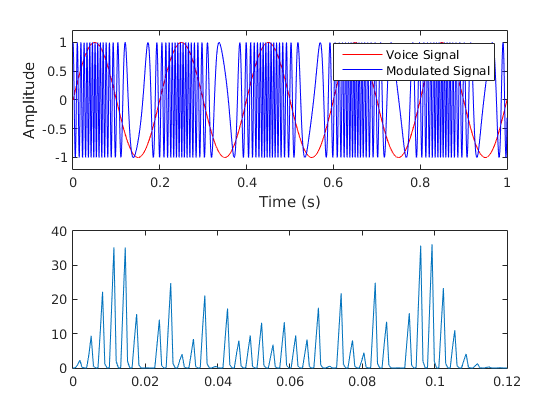

In [167]:
fs = 10e3;                            % Frequência de amostragem do sinal
fc = 87.7;                            % Frequência da portadora
fvoz = 5;                             % Frequência do sinal modulado
t = (0:1/fs:5*(1/fvoz))';             % Base de tempo
xsig = sin(2*pi*fvoz*t);              % Geração do sinal de "voz"

fDev = 77.7;                          % Frequência "diferencial"

x = fmmod(xsig,fc,fs,fDev);           % Geração da modulação em FM

Nfft = fs;                            % Número de pontos da FFT
Xfft = fft(x,Nfft);                   % Encontra a FFT
Xfft = Xfft/Nfft;                     % Encontra a FFT 
Px_fft = sum(Xfft.*conj(Xfft));       % Cálculo da potência na frêquencia

[pxx,w] = periodogram(x,hamming(length(x)), Nfft);
disp(['Potência via FFT (Parseval) = ' num2str(Px_fft)]);
disp(['Somatório de "ppx" normalizado em relação ao seu tamanho ' num2str(sum(pxx)/(Nfft/2+1))]);

subplot(2,1,1)
plot(t,xsig,'r', t,x,'b')
axis([0 5*(1/fvoz) -1.2 1.2])
xlabel('Time (s)')
ylabel('Amplitude')
legend('Voice Signal','Modulated Signal')

subplot(2,1,2)
plot(w,(pxx));
axis([0 0.12 0 40])